# WeatherPy
----

### Analysis
* As expected, the temperatures get warmer the closer you are to the equator. However interestingly, these temperatures are not proportionate in the positive and negative direction. This is most likely due to the axis tilt of the earth of the date at which the data was taken.

* There is no true correlation between latitude and cloudiness, although cloudiness % distributes along the 0%, 20%, 75%, and 90%, which could provide some insight into the properties of clouds.

* There is no true correlation between latitude and humidity, but it’s important to take note of the high percent of cities across all latitudes with 80%-100% humidity.


In [40]:
!pip install citipy

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [50]:
# List for holding lat_lngs and cities
lat_lngs = []
Cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in Cities:
        Cities.append(city)

        
        
# Print the city count to confirm sufficient count
len(Cities)



619

### Perform API Calls


In [51]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

name=[]
cloud= []
country=[]
date=[]
humidity=[]
lat = []
lng=[]
maxtemp = []
windspeed=[]

print("Beginning Data Retrieval")
print("--------------------------")


Record=0
Set=1

for city in Cities:
    response = requests.get(query_url + city).json()
    #Error Handling
    try:
        Record+=1
        if Record >50:
            Set+=1
            Record=1
        print(f"Processing Record {Record} of Set {Set} | {city}.")
        name.append(response['name'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
    except (KeyError, IndexError):
        print("City not found. Skipping...")

#Print when complete
print("--------------------------") 
print("Data Retrieval Complete")
print("--------------------------") 

  

Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 | rikitea.
Processing Record 2 of Set 1 | tiburon.
Processing Record 3 of Set 1 | jamestown.
Processing Record 4 of Set 1 | coquimbo.
Processing Record 5 of Set 1 | lagoa.
Processing Record 6 of Set 1 | xiantao.
Processing Record 7 of Set 1 | hobart.
Processing Record 8 of Set 1 | kuche.
City not found. Skipping...
Processing Record 9 of Set 1 | tumannyy.
City not found. Skipping...
Processing Record 10 of Set 1 | hithadhoo.
Processing Record 11 of Set 1 | ushuaia.
Processing Record 12 of Set 1 | asosa.
Processing Record 13 of Set 1 | punta arenas.
Processing Record 14 of Set 1 | talnakh.
Processing Record 15 of Set 1 | tasiilaq.
Processing Record 16 of Set 1 | longyearbyen.
Processing Record 17 of Set 1 | bambous virieux.
Processing Record 18 of Set 1 | phalombe.
Processing Record 19 of Set 1 | cayenne.
Processing Record 20 of Set 1 | ambikapur.
Processing Record 21 of Set 1 | changji.
Processing Record 2

Processing Record 31 of Set 4 | marawi.
Processing Record 32 of Set 4 | sentyabrskiy.
City not found. Skipping...
Processing Record 33 of Set 4 | torrington.
Processing Record 34 of Set 4 | xining.
Processing Record 35 of Set 4 | vanavara.
Processing Record 36 of Set 4 | svetlyy.
City not found. Skipping...
Processing Record 37 of Set 4 | wamba.
Processing Record 38 of Set 4 | presidencia roque saenz pena.
Processing Record 39 of Set 4 | emmett.
Processing Record 40 of Set 4 | algarrobo.
Processing Record 41 of Set 4 | esperance.
Processing Record 42 of Set 4 | bolungarvik.
City not found. Skipping...
Processing Record 43 of Set 4 | cidreira.
Processing Record 44 of Set 4 | viligili.
City not found. Skipping...
Processing Record 45 of Set 4 | usinsk.
Processing Record 46 of Set 4 | talbahat.
Processing Record 47 of Set 4 | stornoway.
City not found. Skipping...
Processing Record 48 of Set 4 | haines junction.
Processing Record 49 of Set 4 | hermanus.
Processing Record 50 of Set 4 | har

Processing Record 14 of Set 8 | chaoyang.
Processing Record 15 of Set 8 | vaitape.
Processing Record 16 of Set 8 | oldenburg.
Processing Record 17 of Set 8 | leningradskiy.
Processing Record 18 of Set 8 | barguzin.
Processing Record 19 of Set 8 | cuamba.
Processing Record 20 of Set 8 | salihli.
Processing Record 21 of Set 8 | faanui.
Processing Record 22 of Set 8 | zhenjiang.
Processing Record 23 of Set 8 | moa.
Processing Record 24 of Set 8 | alice springs.
Processing Record 25 of Set 8 | hambantota.
Processing Record 26 of Set 8 | shingu.
Processing Record 27 of Set 8 | hinton.
Processing Record 28 of Set 8 | kiunga.
Processing Record 29 of Set 8 | praia da vitoria.
Processing Record 30 of Set 8 | fortuna.
Processing Record 31 of Set 8 | tunduru.
City not found. Skipping...
Processing Record 32 of Set 8 | cherkasskoye.
Processing Record 33 of Set 8 | auki.
Processing Record 34 of Set 8 | lasa.
Processing Record 35 of Set 8 | lodja.
Processing Record 36 of Set 8 | toro.
Processing Rec

Processing Record 45 of Set 11 | ambon.
Processing Record 46 of Set 11 | erice.
Processing Record 47 of Set 11 | kefamenanu.
Processing Record 48 of Set 11 | pliska.
Processing Record 49 of Set 11 | spasskoye.
Processing Record 50 of Set 11 | grindavik.
Processing Record 1 of Set 12 | voskresenskoye.
Processing Record 2 of Set 12 | duz.
City not found. Skipping...
Processing Record 3 of Set 12 | kiboga.
Processing Record 4 of Set 12 | anatolikon.
Processing Record 5 of Set 12 | sakakah.
City not found. Skipping...
Processing Record 6 of Set 12 | beidao.
Processing Record 7 of Set 12 | marrakesh.
Processing Record 8 of Set 12 | disna.
City not found. Skipping...
Processing Record 9 of Set 12 | juruti.
Processing Record 10 of Set 12 | aklavik.
Processing Record 11 of Set 12 | pamanukan.
Processing Record 12 of Set 12 | bondo.
Processing Record 13 of Set 12 | flinders.
Processing Record 14 of Set 12 | vreed en hoop.
City not found. Skipping...
Processing Record 15 of Set 12 | nioro.
Proce

### Convert Raw Data to DataFrame


In [52]:
weather_dict = {
    "City": name,
    "Cloudiness": cloud, 
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lon": lng,
    "Max Temp": maxtemp,
    "Wind Speed": windspeed
}


weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Rikitea,0,PF,1551580080,100,-23.12,-134.97,79.27,11.23
1,Tiburon,90,US,1551580386,100,37.87,-122.46,57.20,3.40
2,Jamestown,24,AU,1551579946,19,-33.21,138.60,96.82,11.79
3,Coquimbo,75,CL,1551574800,82,-29.95,-71.34,62.60,6.93
4,Lagoa,0,PT,1551579872,87,37.14,-8.45,54.00,2.24


In [53]:
#Save
weather_data.to_csv("Lat_Lng_Weather_Data.csv")

### Plotting the Data


#### Latitude vs. Temperature Plot

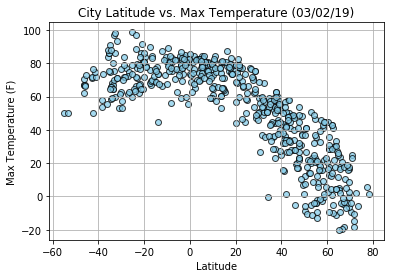

In [54]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/02/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatVsTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

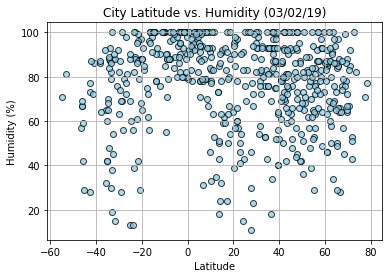

In [55]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03/02/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatVsHum.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

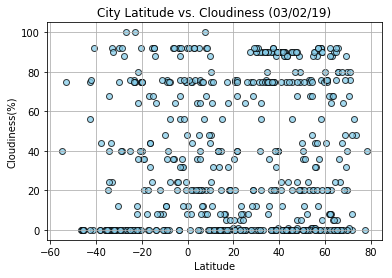

In [56]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03/02/19)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatVsCloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

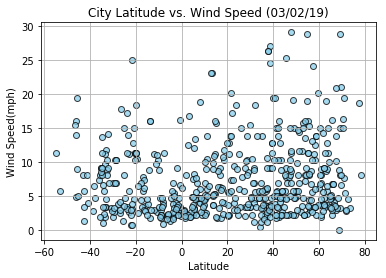

In [57]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03/02/19)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatVsWind.png")

# Show plot
plt.show()